In [4]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean, pdist, squareform

In [9]:
df = pd.read_csv('../data/processed/user_track_df_reduced.csv', index_col=0)

In [10]:
df.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_190,col_191,col_192,col_193,col_194,col_195,col_196,col_197,col_198,col_199
user_000001,3.021644e-03,4.668433e-03,3.883689e-02,5.762521e-02,2.097384e-03,1.264150e-02,1.262693e-02,7.777840e-02,9.754272e-02,-2.582136e-02,...,3.338364e-01,1.869874e-01,1.944070e-01,-1.445734e-02,-2.618242e-01,1.118979e-01,1.797776e-01,1.983650e-01,-7.011108e-02,5.517736e-01
user_000002,1.204502e-01,1.789309e-02,3.065946e-01,2.453592e-01,1.883537e-02,1.240423e-02,4.932193e-02,7.151505e-01,4.424773e-01,-2.434824e-01,...,2.427367e-01,2.107257e-02,-1.228779e+00,6.050379e-01,1.264735e-01,9.522298e-02,-4.738014e+00,-3.525000e+00,1.171192e+00,-4.692827e-01
user_000003,3.070551e-17,9.849368e-17,-1.207720e-15,-3.897550e-15,-1.110458e-14,-2.192399e-15,1.846323e-15,-4.225624e-15,-4.960894e-17,5.635591e-15,...,-1.330022e-14,4.473169e-14,-8.141009e-14,-2.677717e-14,-9.341768e-14,-2.366045e-14,3.643022e-14,5.530035e-14,-3.392262e-14,8.304528e-14
user_000004,1.872666e-02,1.887559e-02,9.900620e-02,1.403927e-01,4.205552e-03,1.881086e-02,6.792681e-03,2.635352e-01,4.344778e-01,-1.739431e-01,...,1.406181e-02,-4.883773e-02,6.873458e-03,6.838263e-03,-2.181793e-02,1.482329e-02,-7.638457e-02,-3.207995e-02,-3.431622e-02,-5.357577e-02
user_000005,1.859436e-02,1.342944e+00,8.044241e-01,1.066846e-01,1.036744e-01,2.290676e-01,1.076880e+00,1.590765e+00,-2.057424e-02,-6.403790e-02,...,-1.685627e-01,3.362391e-01,-1.986051e-01,1.248897e-01,-8.713013e-03,1.523222e-02,3.425300e-01,-9.777622e-02,4.199089e-02,-1.440306e-01


In [186]:
df.describe()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_190,col_191,col_192,col_193,col_194,col_195,col_196,col_197,col_198,col_199
count,5.900000e+02,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,...,590.000000,5.900000e+02,5.900000e+02,5.900000e+02,590.000000,590.000000,590.000000,5.900000e+02,590.000000,590.000000
mean,1.122015e+00,0.929833,1.200160,1.428008,0.544450,0.688483,0.501684,0.728495,0.763877,0.098587,...,0.054091,4.190154e-02,-6.412900e-03,1.944362e-02,0.131656,0.101407,0.078581,6.863438e-02,0.141564,0.074636
std,2.253738e+01,18.576465,13.696517,13.193804,11.654737,10.523619,10.103574,8.857002,8.675639,8.426270,...,1.953336,1.942847e+00,1.936572e+00,1.930395e+00,1.921817,1.912775,1.893344,1.881103e+00,1.862190,1.853931
min,-2.064423e-23,-2.355554,-7.331199,-12.882706,-7.660982,-11.527281,-10.433482,-20.669819,-41.603989,-77.197742,...,-14.194570,-1.390321e+01,-1.036031e+01,-1.552725e+01,-9.901674,-10.731565,-10.935749,-1.119036e+01,-12.392662,-15.306282
25%,8.745902e-04,0.004708,0.016985,0.004922,0.000029,0.000443,0.000013,0.015310,0.006690,-0.114127,...,-0.095132,-1.209914e-01,-1.097180e-01,-1.245276e-01,-0.094964,-0.061800,-0.090376,-1.298642e-01,-0.085140,-0.133764
50%,9.148209e-03,0.029697,0.097273,0.039857,0.002113,0.012446,0.007506,0.102454,0.071025,-0.017266,...,0.001575,-2.383255e-16,-8.838425e-11,-1.475113e-16,0.001201,0.001324,0.002240,1.751412e-16,0.001832,-0.000082
75%,4.496726e-02,0.113672,0.351123,0.174254,0.023570,0.067620,0.060554,0.373825,0.384108,-0.000285,...,0.124833,1.061238e-01,1.175494e-01,1.072525e-01,0.107613,0.102304,0.132456,1.020343e-01,0.168527,0.116166
max,5.472458e+02,451.072460,327.958847,258.570804,282.897929,245.877032,243.849052,209.897853,190.621556,188.894682,...,26.497655,1.766583e+01,2.824712e+01,1.695891e+01,24.003500,30.221933,14.153001,1.808035e+01,16.977349,16.933302


In [42]:
def similarity_func(x, y):
    return 1 /(1 + euclidean(x, y))
dists = pdist(df, similarity_func)
df_euclid = pd.DataFrame(squareform(dists), columns=df.index, index=df.index)

In [43]:
df_euclid

,user_000001,user_000002,user_000003,user_000004,user_000005,user_000006,user_000009,user_000010,user_000011,user_000012,...,user_000980,user_000986,user_000989,user_000991,user_000992,user_000993,user_000994,user_000995,user_000998,user_001000
user_000001,0.000000,0.011987,0.014740,0.006349,0.010199,0.014619,0.014740,0.008705,0.014740,0.009444,...,0.008819,0.007977,0.014739,0.014709,0.014735,0.010952,0.014582,0.005040,0.014736,0.013435
user_000002,0.011987,0.000000,0.020324,0.006644,0.011588,0.020115,0.020324,0.009520,0.020325,0.010498,...,0.009686,0.008589,0.020328,0.020196,0.020325,0.012703,0.020010,0.005184,0.020300,0.018545
user_000003,0.014740,0.020324,0.000000,0.007016,0.014022,0.110613,1.000000,0.010730,0.951591,0.012207,...,0.010945,0.009441,0.562724,0.186436,0.388815,0.016035,0.092381,0.005354,0.363562,0.032002
user_000004,0.006349,0.006644,0.007016,0.000000,0.006288,0.007005,0.007016,0.005885,0.007016,0.006098,...,0.005921,0.005644,0.007016,0.007013,0.007016,0.006441,0.006999,0.004264,0.007015,0.006865
user_000005,0.010199,0.011588,0.014022,0.006288,0.000000,0.013933,0.014022,0.008550,0.014022,0.009249,...,0.008662,0.007880,0.014021,0.014044,0.014017,0.010815,0.013942,0.005011,0.014017,0.012887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
user_000993,0.010952,0.012703,0.016035,0.006441,0.010815,0.015996,0.016035,0.008948,0.016035,0.009767,...,0.009096,0.008217,0.016033,0.015996,0.016030,0.000000,0.015845,0.005086,0.016111,0.014613
user_000994,0.014582,0.020010,0.092381,0.006999,0.013942,0.071642,0.092381,0.010670,0.092385,0.012113,...,0.010997,0.009399,0.092059,0.103124,0.093132,0.015845,0.000000,0.005417,0.093236,0.030564
user_000995,0.005040,0.005184,0.005354,0.004264,0.005011,0.005349,0.005354,0.004799,0.005354,0.004913,...,0.004840,0.005170,0.005355,0.005367,0.005354,0.005086,0.005417,0.000000,0.005354,0.005285
user_000998,0.014736,0.020300,0.363562,0.007015,0.014017,0.109183,0.363562,0.010728,0.363366,0.012205,...,0.010943,0.009440,0.389849,0.184287,0.323417,0.016111,0.093236,0.005354,0.000000,0.032174


In [89]:
# get the index of top 5 similar users
top_similar_index = np.argsort(df_euclid.values)[:,-5:]
top_similar_user_dict = {}
# construct a dictionary of top 5 similar users for each user
for i in range(len(df_euclid.index)):
    index_list = list(top_similar_index[i])
    # reverse the index so that the most similar user is at the first position
    index_list.reverse()
    top_similar_user_dict[df_euclid.index[i]] = df_euclid.index[index_list]

In [88]:
top_similar_user_dict

{'user_000001': Index(['user_000241', 'user_000887', 'user_000721', 'user_000763',
        'user_000351'],
       dtype='object'),
 'user_000002': Index(['user_000238', 'user_000970', 'user_000962', 'user_000341',
        'user_000440'],
       dtype='object'),
 'user_000003': Index(['user_000489', 'user_000420', 'user_000967', 'user_000633',
        'user_000777'],
       dtype='object'),
 'user_000004': Index(['user_000239', 'user_000564', 'user_000394', 'user_000914',
        'user_000278'],
       dtype='object'),
 'user_000005': Index(['user_000355', 'user_000794', 'user_000241', 'user_000977',
        'user_000560'],
       dtype='object'),
 'user_000006': Index(['user_000210', 'user_000262', 'user_000834', 'user_000076',
        'user_000687'],
       dtype='object'),
 'user_000009': Index(['user_000420', 'user_000777', 'user_000967', 'user_000633',
        'user_000489'],
       dtype='object'),
 'user_000010': Index(['user_000096', 'user_000440', 'user_000386', 'user_000898',


# Clustering

In [165]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

## HAC

In [127]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from matplotlib import pyplot as plt

In [225]:
# first build a pairwise distances array between all users
dists = pdist(df, 'cosine')
# build linkage matrix
linkage_matrix = linkage(dists, 'ward')

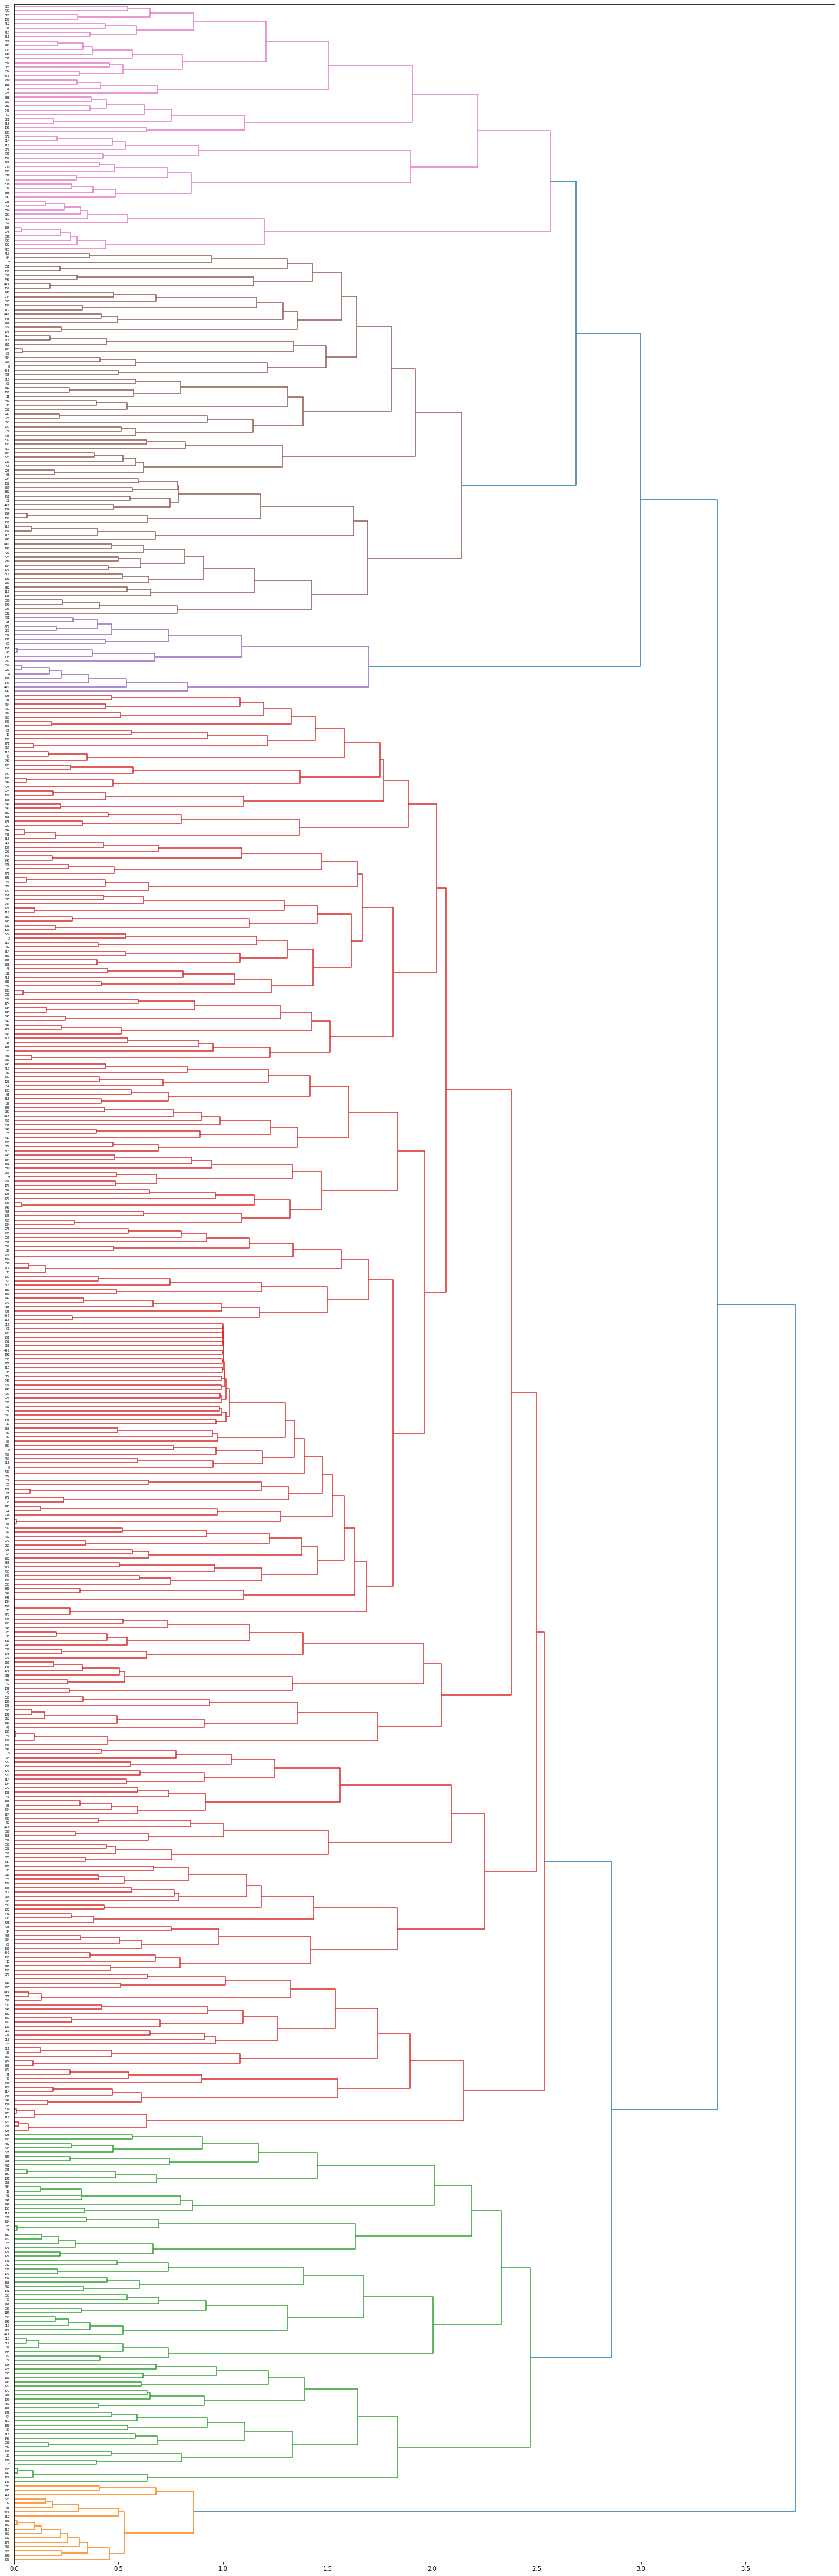

In [227]:
# plot the dendrogram
fig = plt.figure(figsize=(25, 80))
dn = dendrogram(linkage_matrix, orientation='right')
plt.show()

In [210]:
# cut the linkage matrix at the specified distance
assignments = fcluster(linkage_matrix, 100, 'distance')
silhouette_score(df, assignments)

0.5124448031295984

In [182]:
hac_sl_list =[]
for i in np.arange(0.01, 2, 0.01):
    assignments = fcluster(linkage_matrix, i, 'distance')
    hac_sl_list.append(silhouette_score(df, assignments))

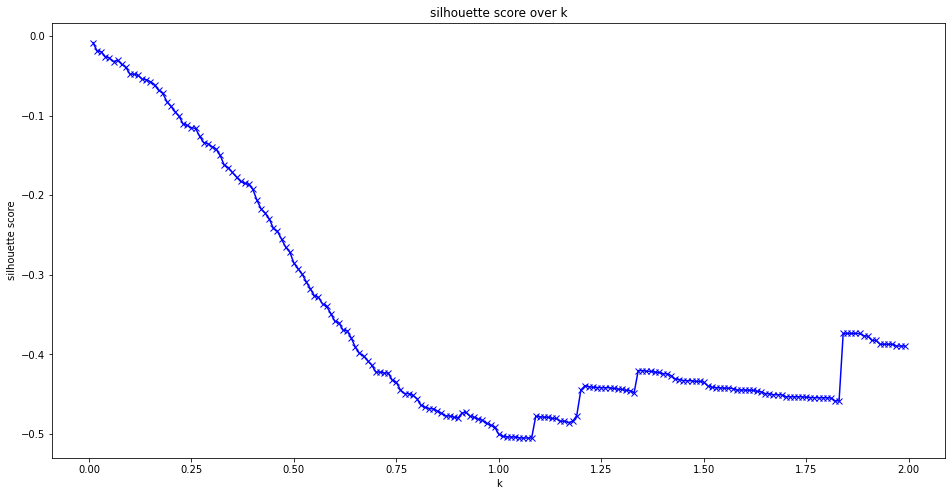

In [184]:
plt.figure(figsize=(16,8))
plt.plot(np.arange(0.01, 2, 0.01), hac_sl_list, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('silhouette score over clusters splitted')
plt.show()

## DBSCAN

In [221]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.5, min_samples=2, metric='cosine').fit(df)

In [222]:
pd.Series(clustering.labels_).unique()

array([ 0, -1,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50])

In [223]:
silhouette_score(df, clustering.labels_)

-0.6053727399577397

In [214]:
davies_bouldin_score(df, clustering.labels_)

5.340122972172064

## Spectual Clustering

In [162]:
from sklearn.cluster import SpectralClustering
sh_list = []
K = range(10,100)
for k in tqdm(K):
        clustering = SpectralClustering(n_clusters=k,
                assign_labels='discretize',
                random_state=0).fit(df)
        sh_list.append(silhouette_score(df, clustering.labels_))

  0%|          | 0/90 [00:00<?, ?it/s]/opt/homebrew/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
  1%|          | 1/90 [00:00<00:17,  5.10it/s]/opt/homebrew/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
  2%|▏         | 2/90 [00:00<00:13,  6.59it/s]/opt/homebrew/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
  3%|▎         | 3/90 [00:00<00:14,  5.85it/s]/opt/homebrew/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
  4%|▍         | 4/90 [00:00<00:13,  6.44it/s]/opt/homeb

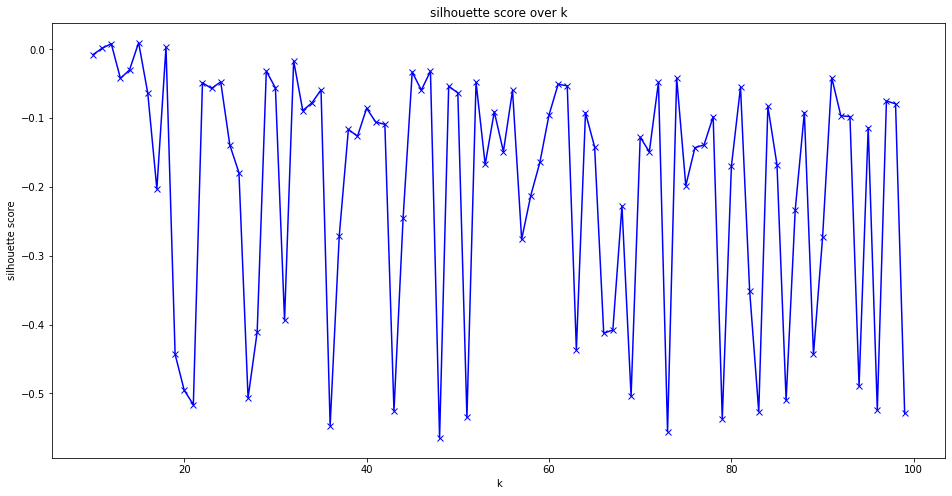

In [163]:
plt.figure(figsize=(16,8))
plt.plot(K, sh_list, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('silhouette score over k')
plt.show()

## K-means

In [154]:
from sklearn.cluster import KMeans
from tqdm import tqdm
distortions = []
K = range(10,100)
for k in tqdm(K):
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

100%|██████████| 90/90 [00:28<00:00,  3.20it/s]


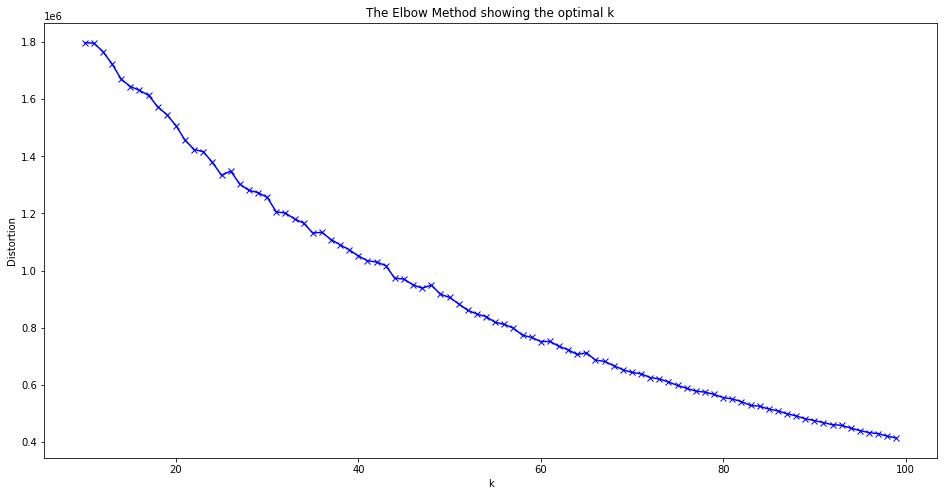

In [155]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [224]:
kmeanModel = KMeans(n_clusters=100)
kmeanModel.fit(df)
silhouette_score(df, kmeanModel.labels_)


0.5315997885756364

## Visualization

In [171]:
def scatter(X):
    plt.figure(figsize=(16,8))
    plt.scatter(X[:, 0], X[:, 1])

In [167]:
from sklearn.manifold import TSNE
data_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random').fit_transform(df)

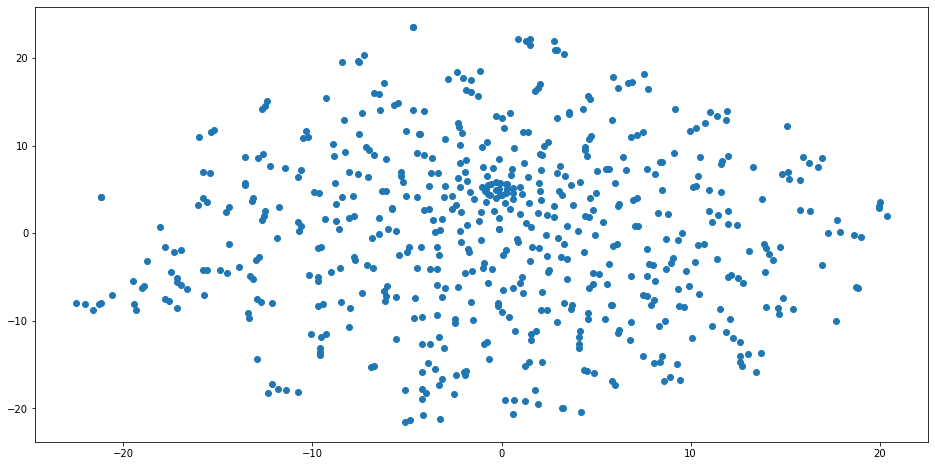

In [172]:
scatter(data_embedded)